Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [3]:
import pandas as pd
import numpy as np
import time

start_time = time.time()
pandas_data = pd.DataFrame({'data': pd.Series(pd.np.random.randint(1, 101, size=1000000))})
pandas_time = time.time() - start_time


start_time = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
numpy_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")



Pandas time: 0.011631 seconds
NumPy time: 0.008008 seconds
NumPy is faster.


C:\Users\丁钲洋\AppData\Local\Temp\ipykernel_20736\2013258498.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pandas_data = pd.DataFrame({'data': pd.Series(pd.np.random.randint(1, 101, size=1000000))})


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [15]:
import pandas as pd
import numpy as np
import time

# 使用 Pandas 加载数据集
df = pd.read_csv('sleep_health.csv')

# 检查列名
print("Pandas 列名:\n", df.columns.tolist())

# 使用 NumPy 加载数据集，确保使用正确的参数
data = np.genfromtxt('sleep_health.csv', delimiter=',', dtype=None, encoding='utf-8', names=True)

# 打印 NumPy 加载的数据的字段名
print("NumPy 列名:\n", data.dtype.names)

# 使用 Pandas 计算均值
mean_values_pandas = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas mean:\n", mean_values_pandas)

# 使用 NumPy 计算均值
mean_values_numpy = {
    'Sleep Duration': np.mean(data['Sleep_Duration']),
    'Systolic blood pressure': np.mean(data['Systolic_blood_pressure']),
    'Diastolic blood pressure': np.mean(data['Diastolic_blood_pressure']),
    'Heart Rate': np.mean(data['Heart_Rate']),
    'Daily Steps': np.mean(data['Daily_Steps'])
}
print("NumPy mean:\n", mean_values_numpy)

# 3. 使用 Pandas 计算相关性
correlation_pandas = df.corr()
sleep_duration_age_corr = df['Sleep Duration'].corr(df['Age'])
sleep_duration_heart_rate_corr = df['Sleep Duration'].corr(df['Heart Rate'])
sleep_duration_daily_steps_corr = df['Sleep Duration'].corr(df['Daily Steps'])

print("Pandas correlation matrix:\n", correlation_pandas)
print("Pandas correlation (sleep duration and age):", sleep_duration_age_corr)
print("Pandas correlation (sleep duration and heart rate):", sleep_duration_heart_rate_corr)
print("Pandas correlation (sleep duration and daily steps):", sleep_duration_daily_steps_corr)

# 4. 使用 NumPy 计算相关性
correlation_numpy_age = np.corrcoef(data['Sleep_Duration'], data['Age'])[0, 1]
print("NumPy correlation (sleep duration and age):", correlation_numpy_age)

correlation_numpy_heart_rate = np.corrcoef(data['Sleep_Duration'], data['Heart_Rate'])[0, 1]
print("NumPy correlation (sleep duration and heart rate):", correlation_numpy_heart_rate)

correlation_numpy_daily_steps = np.corrcoef(data['Sleep_Duration'], data['Daily_Steps'])[0, 1]
print("NumPy correlation (sleep duration and daily steps):", correlation_numpy_daily_steps)

# 5. 使用 Pandas 计算标准差
std_dev_pandas = df['Sleep Duration'].std()
print("Pandas standard deviation (sleep duration):", std_dev_pandas)

# 6. 使用 NumPy 计算标准差
std_dev_numpy = np.std(data['Sleep_Duration'])
print("NumPy standard deviation (sleep duration):", std_dev_numpy)

# 7. 计算时间
start_time_pandas = time.time()
# 重新计算均值和标准差
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
# 重新计算均值和标准差
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f"Time to use Pandas: {pandas_time:.6f} seconds")
print(f"Time spent using NumPy: {numpy_time:.6f} seconds")

# 5.1 判断哪个更快
if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas 列名:
 ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
NumPy 列名:
 ('Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Systolic_blood_pressure', 'Diastolic_blood_pressure', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder')
Pandas mean:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy mean:
 {'Sleep Duration': 7.132085561497325, 'Systolic blood pressure': 128.55347593582889, 'Diastolic blood pressure': 84.64973262032086, 'Heart Rate': 70.16577540106952, 'Daily Steps': 6816.844919786096}
Pandas correlation matrix:
                     

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

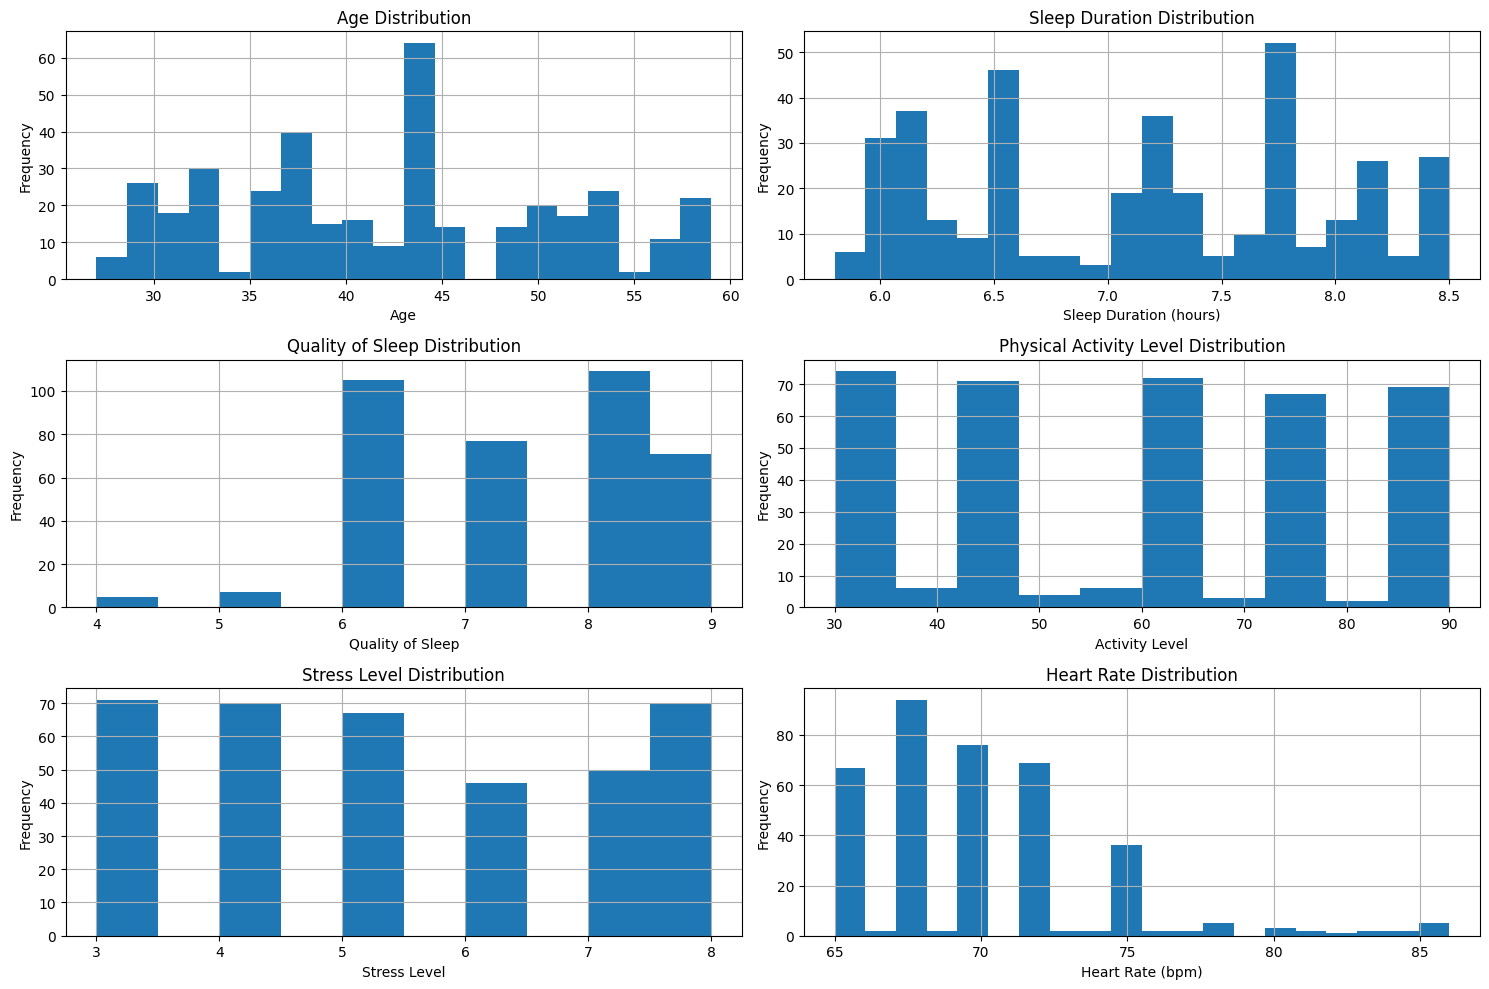

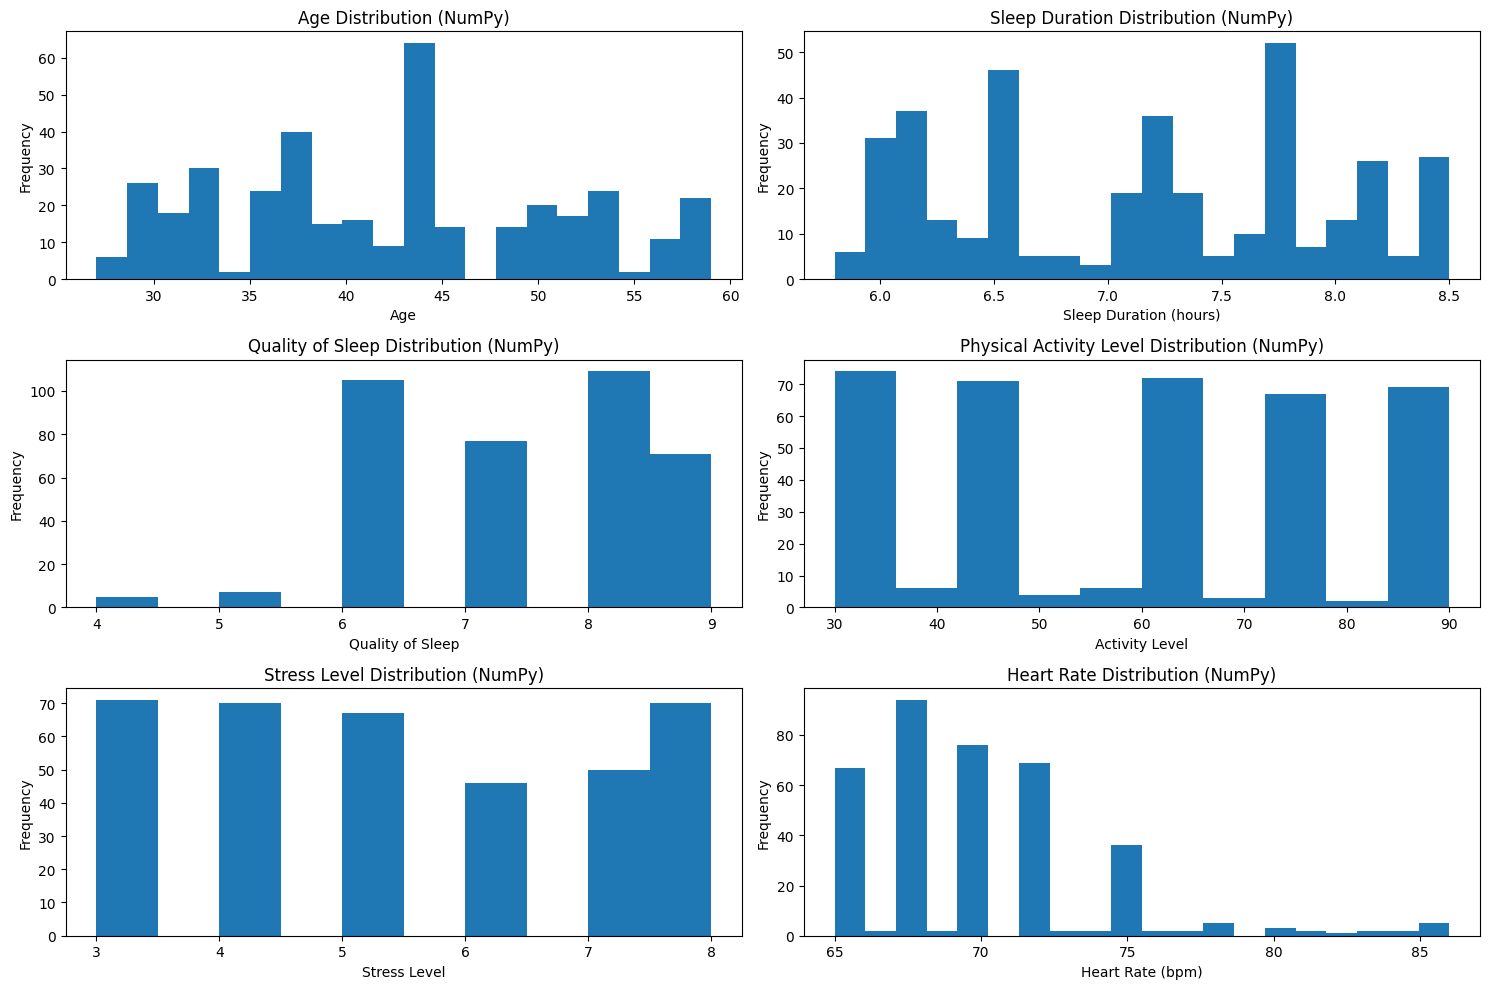

Time to use Pandas: 1.0583 seconds
Time spent using NumPy: 1.2807 seconds


In [13]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# 加载数据集
df = pd.read_csv('sleep_health.csv')

# 记录 Pandas 绘图的时间
start_time_pandas = time.time()

# 1. 使用 Pandas 绘制分布图
plt.figure(figsize=(15, 10))

# 1.1 年龄分布
plt.subplot(3, 2, 1)
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 1.2 睡眠时长分布
plt.subplot(3, 2, 2)
df['Sleep Duration'].hist(bins=20)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

# 1.3 睡眠质量分布
plt.subplot(3, 2, 3)
df['Quality of Sleep'].hist(bins=10)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

# 1.4 身体活动水平分布
plt.subplot(3, 2, 4)
df['Physical Activity Level'].hist(bins=10)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Activity Level')
plt.ylabel('Frequency')

# 1.5 压力水平分布
plt.subplot(3, 2, 5)
df['Stress Level'].hist(bins=10)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

# 1.6 心率分布
plt.subplot(3, 2, 6)
df['Heart Rate'].hist(bins=20)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 记录 NumPy 绘图的时间
start_time_numpy = time.time()

# 2. 使用 NumPy 绘制分布图
plt.figure(figsize=(15, 10))

# 2.1 年龄分布
plt.subplot(3, 2, 1)
plt.hist(df['Age'].values, bins=20)
plt.title('Age Distribution (NumPy)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2.2 睡眠时长分布
plt.subplot(3, 2, 2)
plt.hist(df['Sleep Duration'].values, bins=20)
plt.title('Sleep Duration Distribution (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

# 2.3 睡眠质量分布
plt.subplot(3, 2, 3)
plt.hist(df['Quality of Sleep'].values, bins=10)
plt.title('Quality of Sleep Distribution (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

# 2.4 身体活动水平分布
plt.subplot(3, 2, 4)
plt.hist(df['Physical Activity Level'].values, bins=10)
plt.title('Physical Activity Level Distribution (NumPy)')
plt.xlabel('Activity Level')
plt.ylabel('Frequency')

# 2.5 压力水平分布
plt.subplot(3, 2, 5)
plt.hist(df['Stress Level'].values, bins=10)
plt.title('Stress Level Distribution (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

# 2.6 心率分布
plt.subplot(3, 2, 6)
plt.hist(df['Heart Rate'].values, bins=20)
plt.title('Heart Rate Distribution (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 输出时间差异
print(f"Time to use Pandas: {pandas_time:.4f} seconds")
print(f"Time spent using NumPy: {numpy_time:.4f} seconds")

<Figure size 1200x800 with 0 Axes>

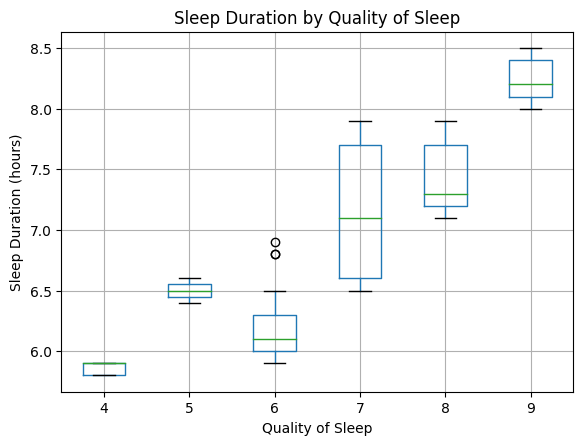

<Figure size 1200x800 with 0 Axes>

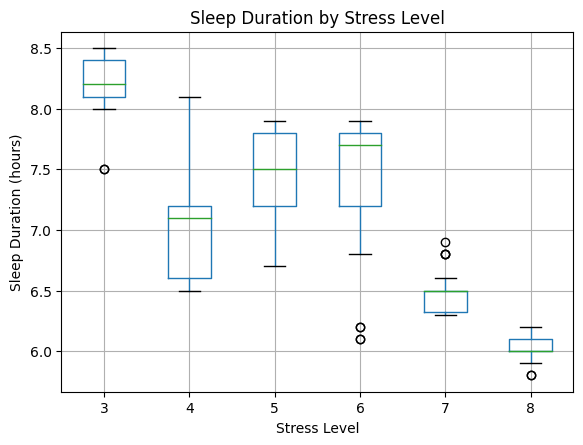

<Figure size 1200x800 with 0 Axes>

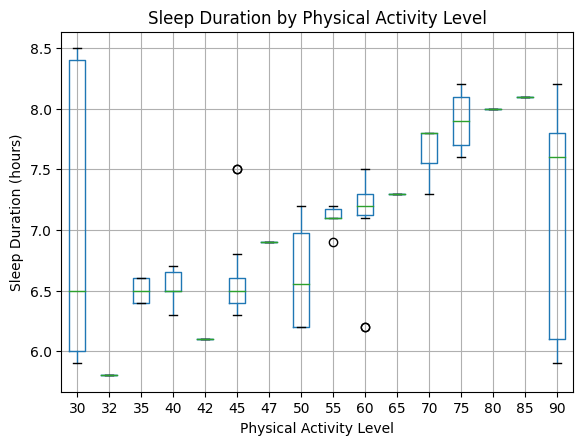

<Figure size 1200x800 with 0 Axes>

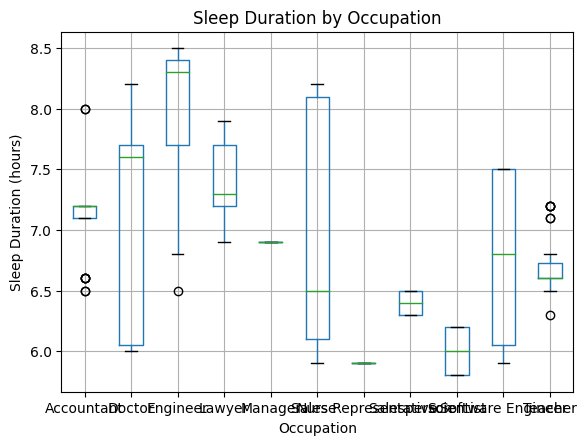

<Figure size 1200x800 with 0 Axes>

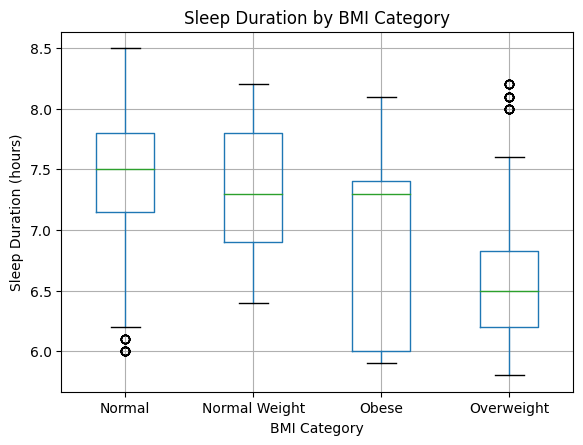

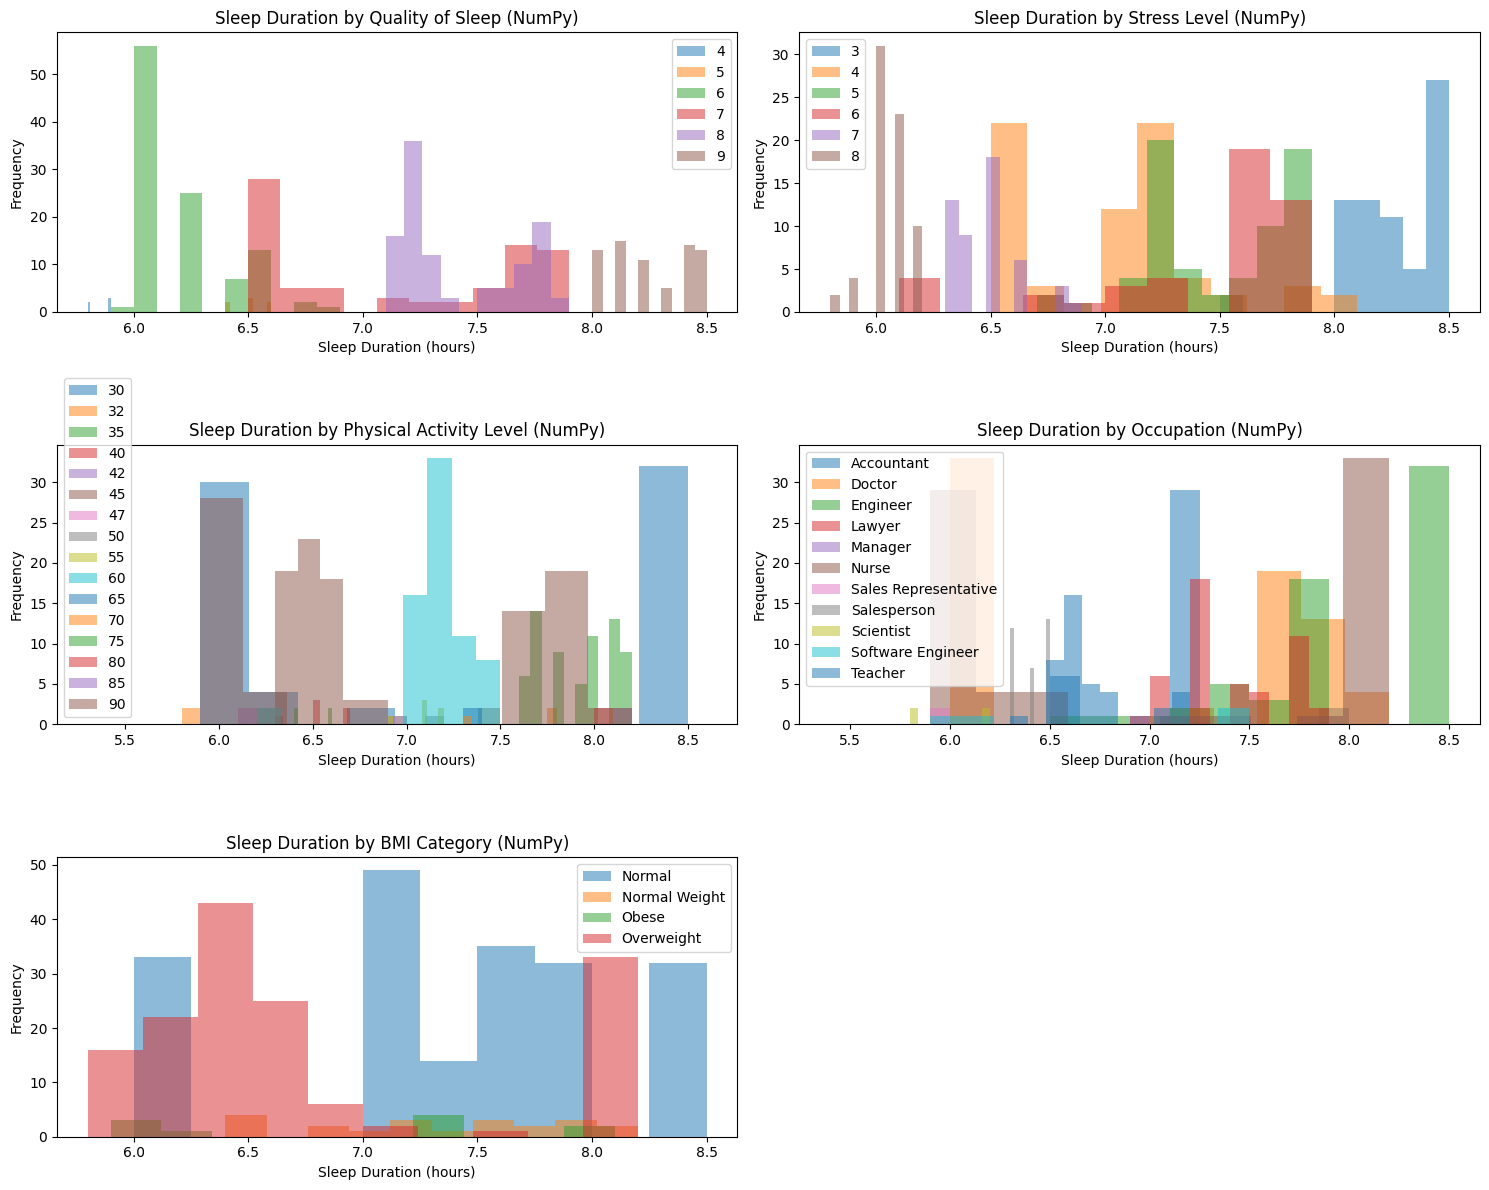

Time to use Pandas: 1.1221 seconds
Time spent using NumPy: 2.8386 seconds


In [12]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# 加载数据集
df = pd.read_csv('sleep_health.csv')

start_time_pandas = time.time()
# 3.1 根据睡眠质量绘制睡眠时长分布
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Quality of Sleep')
plt.title('Sleep Duration by Quality of Sleep')
plt.suptitle('')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 根据压力水平绘制睡眠时长分布
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Stress Level')
plt.title('Sleep Duration by Stress Level')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 根据身体活动水平绘制睡眠时长分布
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Physical Activity Level')
plt.title('Sleep Duration by Physical Activity Level')
plt.suptitle('')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 根据职业绘制睡眠时长分布
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='Occupation')
plt.title('Sleep Duration by Occupation')
plt.suptitle('')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.5 根据BMI类别绘制睡眠时长分布
plt.figure(figsize=(12, 8))
df.boxplot(column='Sleep Duration', by='BMI Category')
plt.title('Sleep Duration by BMI Category')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 记录 NumPy 绘图的时间
start_time_numpy = time.time()

# 4. 使用 NumPy 根据不同因素绘制睡眠时长的分布
plt.figure(figsize=(15, 12))

# 4.1 睡眠质量与睡眠时长
plt.subplot(3, 2, 1)
quality_levels = np.unique(df['Quality of Sleep'])
for level in quality_levels:
    plt.hist(df[df['Quality of Sleep'] == level]['Sleep Duration'], bins=10, alpha=0.5, label=str(level))
plt.title('Sleep Duration by Quality of Sleep (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

# 4.2 压力水平与睡眠时长
plt.subplot(3, 2, 2)
stress_levels = np.unique(df['Stress Level'])
for level in stress_levels:
    plt.hist(df[df['Stress Level'] == level]['Sleep Duration'], bins=10, alpha=0.5, label=str(level))
plt.title('Sleep Duration by Stress Level (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

# 4.3 身体活动水平与睡眠时长
plt.subplot(3, 2, 3)
activity_levels = np.unique(df['Physical Activity Level'])
for level in activity_levels:
    plt.hist(df[df['Physical Activity Level'] == level]['Sleep Duration'], bins=10, alpha=0.5, label=str(level))
plt.title('Sleep Duration by Physical Activity Level (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

# 4.4 职业与睡眠时长
plt.subplot(3, 2, 4)
occupations = np.unique(df['Occupation'])
for occupation in occupations:
    plt.hist(df[df['Occupation'] == occupation]['Sleep Duration'], bins=10, alpha=0.5, label=str(occupation))
plt.title('Sleep Duration by Occupation (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

# 4.5 BMI与睡眠时长
plt.subplot(3, 2, 5)
bmi_categories = np.unique(df['BMI Category'])
for category in bmi_categories:
    plt.hist(df[df['BMI Category'] == category]['Sleep Duration'], bins=10, alpha=0.5, label=str(category))
plt.title('Sleep Duration by BMI Category (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 输出时间差异
print(f"Time to use Pandas: {pandas_time:.4f} seconds")
print(f"Time spent using NumPy: {numpy_time:.4f} seconds")


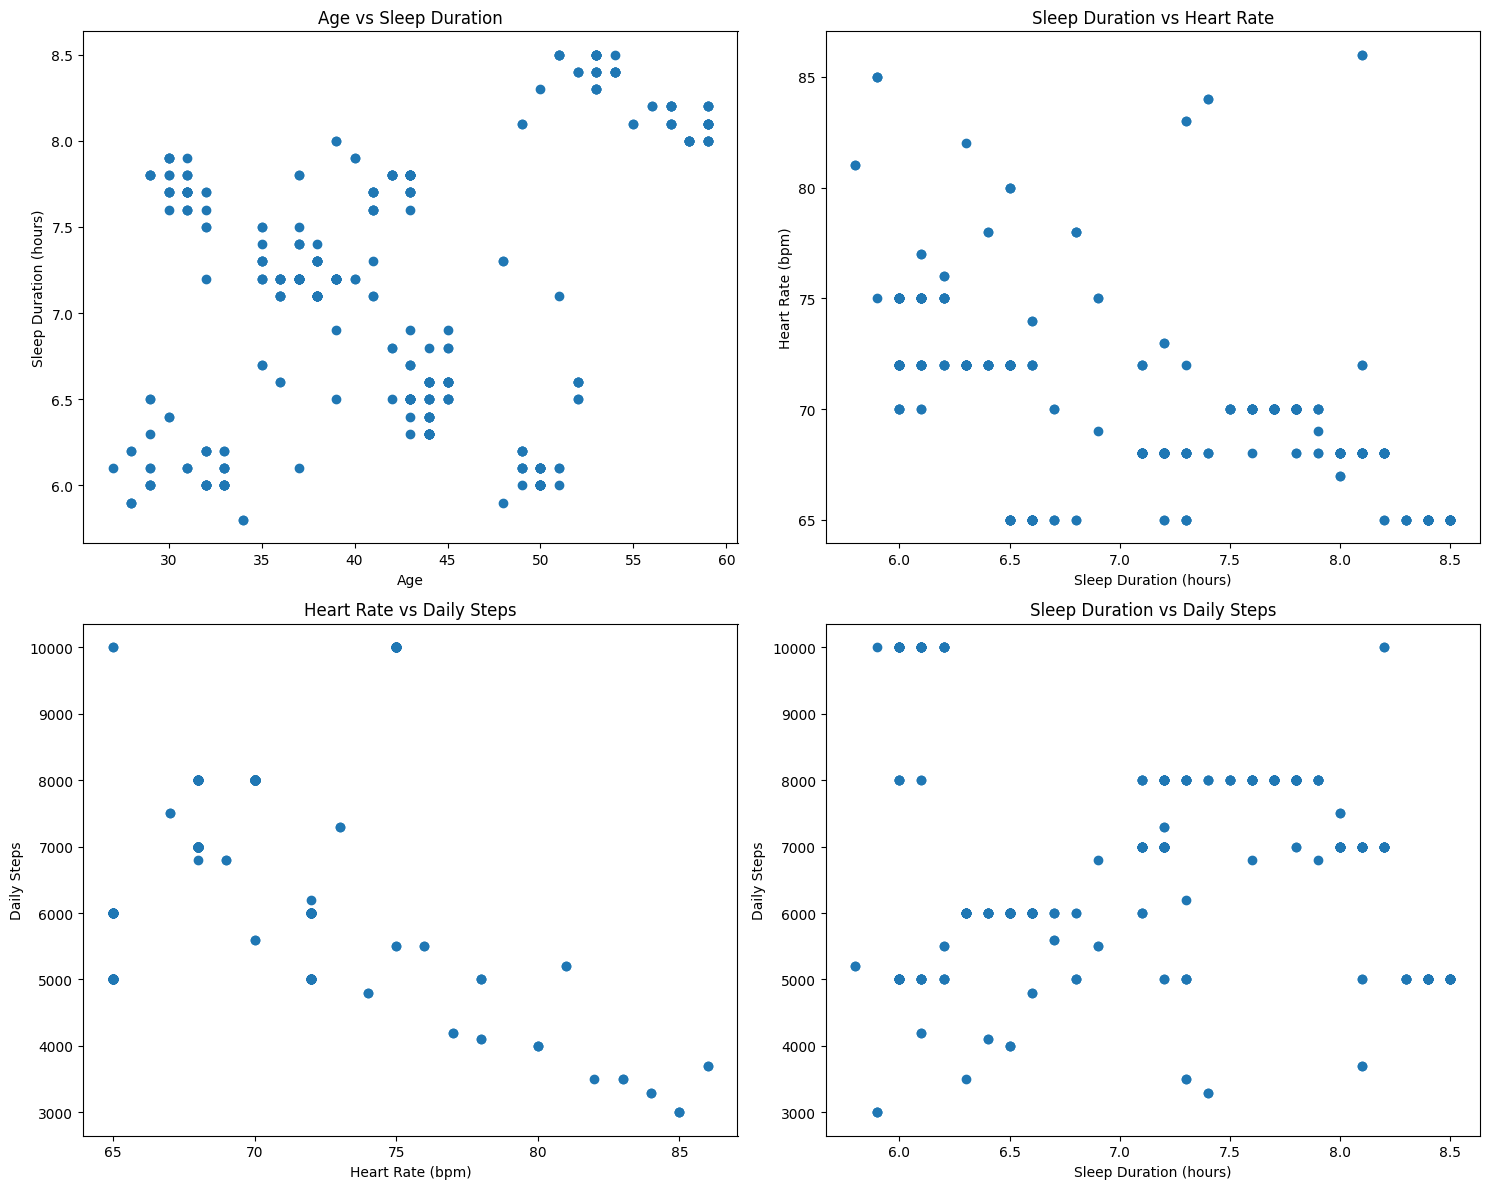

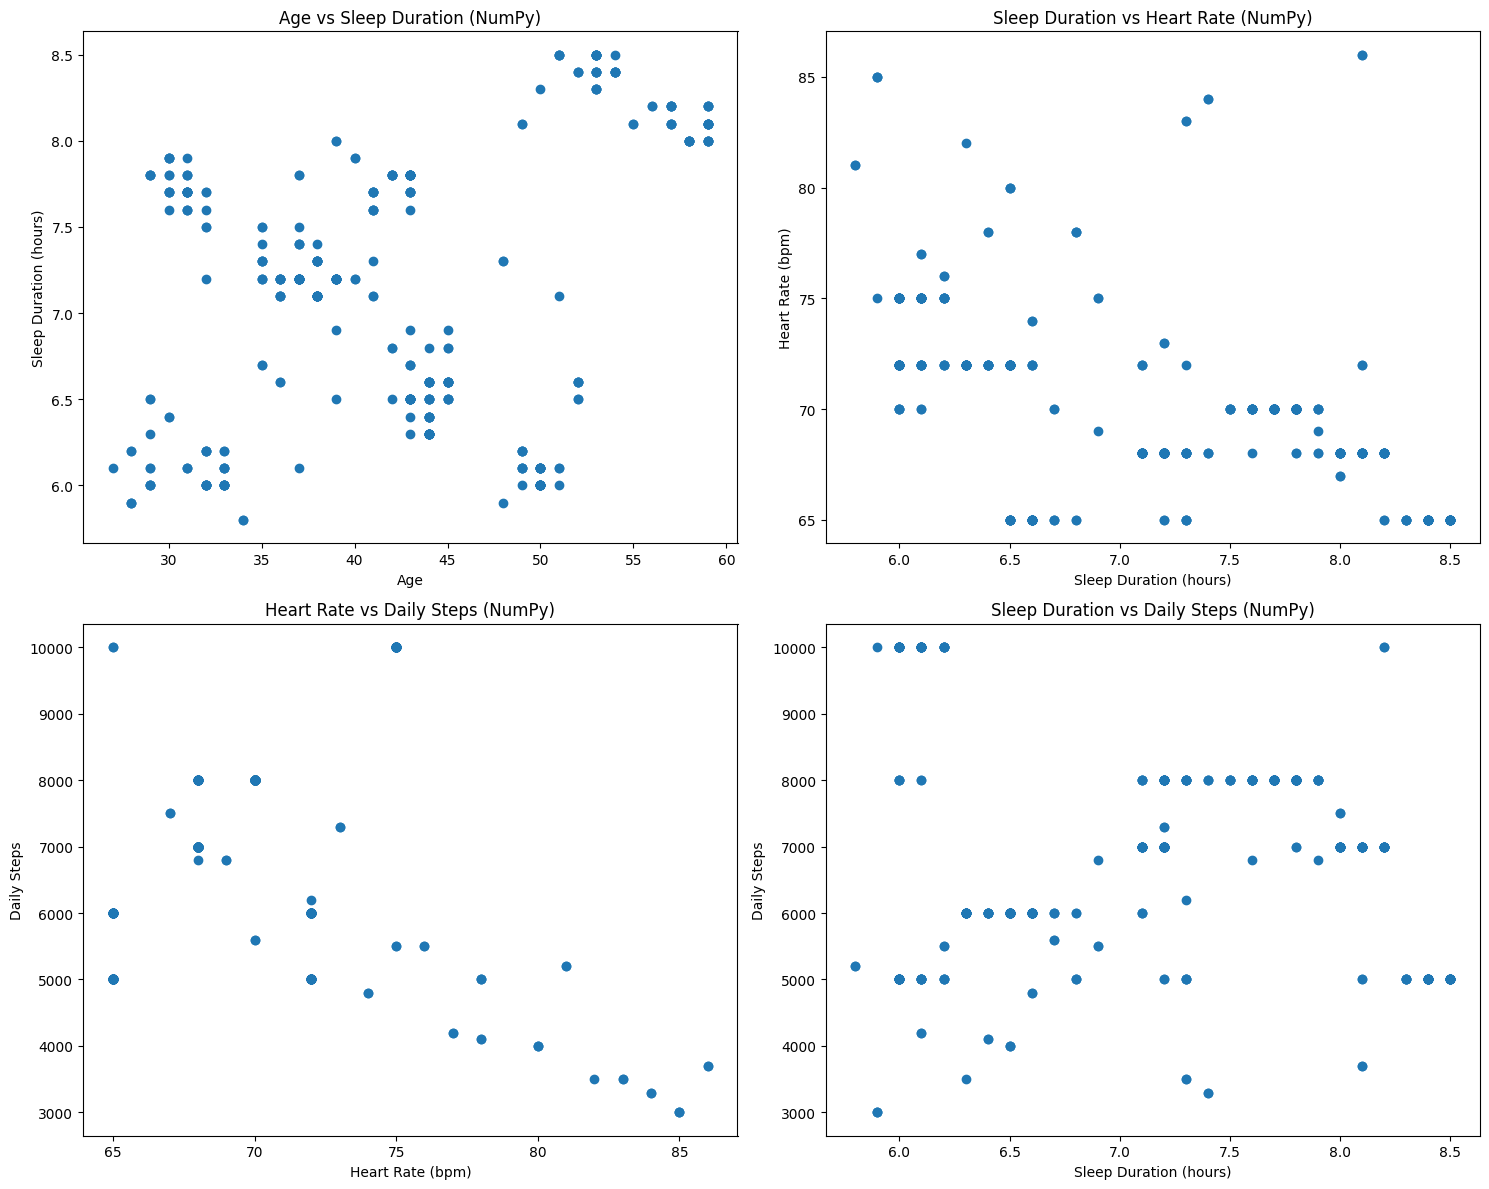

Time to use Pandas: 0.6097 seconds
Time spent using NumPy: 0.6694 seconds


In [11]:
# 记录 Pandas 绘图的时间
start_time_pandas = time.time()
# 5. 使用 Pandas 绘制关系图
plt.figure(figsize=(15, 12))

# 5.1 年龄与睡眠时长关系
plt.subplot(2, 2, 1)
plt.scatter(df['Age'], df['Sleep Duration'])
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')

# 5.2 睡眠时长与心率关系
plt.subplot(2, 2, 2)
plt.scatter(df['Sleep Duration'], df['Heart Rate'])
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')

# 5.3 心率与日步数关系
plt.subplot(2, 2, 3)
plt.scatter(df['Heart Rate'], df['Daily Steps'])
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')

# 5.4 睡眠时长与日步数关系
plt.subplot(2, 2, 4)
plt.scatter(df['Sleep Duration'], df['Daily Steps'])
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')

plt.tight_layout()
plt.show()
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 记录 NumPy 绘图的时间
start_time_numpy = time.time()
# 6. 使用 NumPy 绘制关系图
plt.figure(figsize=(15, 12))

# 6.1 年龄与睡眠时长关系
plt.subplot(2, 2, 1)
plt.scatter(df['Age'].values, df['Sleep Duration'].values)
plt.title('Age vs Sleep Duration (NumPy)')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')

# 6.2 睡眠时长与心率关系
plt.subplot(2, 2, 2)
plt.scatter(df['Sleep Duration'].values, df['Heart Rate'].values)
plt.title('Sleep Duration vs Heart Rate (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')

# 6.3 心率与日步数关系
plt.subplot(2, 2, 3)
plt.scatter(df['Heart Rate'].values, df['Daily Steps'].values)
plt.title('Heart Rate vs Daily Steps (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')

# 6.4 睡眠时长与日步数关系
plt.subplot(2, 2, 4)
plt.scatter(df['Sleep Duration'].values, df['Daily Steps'].values)
plt.title('Sleep Duration vs Daily Steps (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')

plt.tight_layout()
plt.show()
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 输出时间差异
print(f"Time to use Pandas: {pandas_time:.4f} seconds")
print(f"Time spent using NumPy: {numpy_time:.4f} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



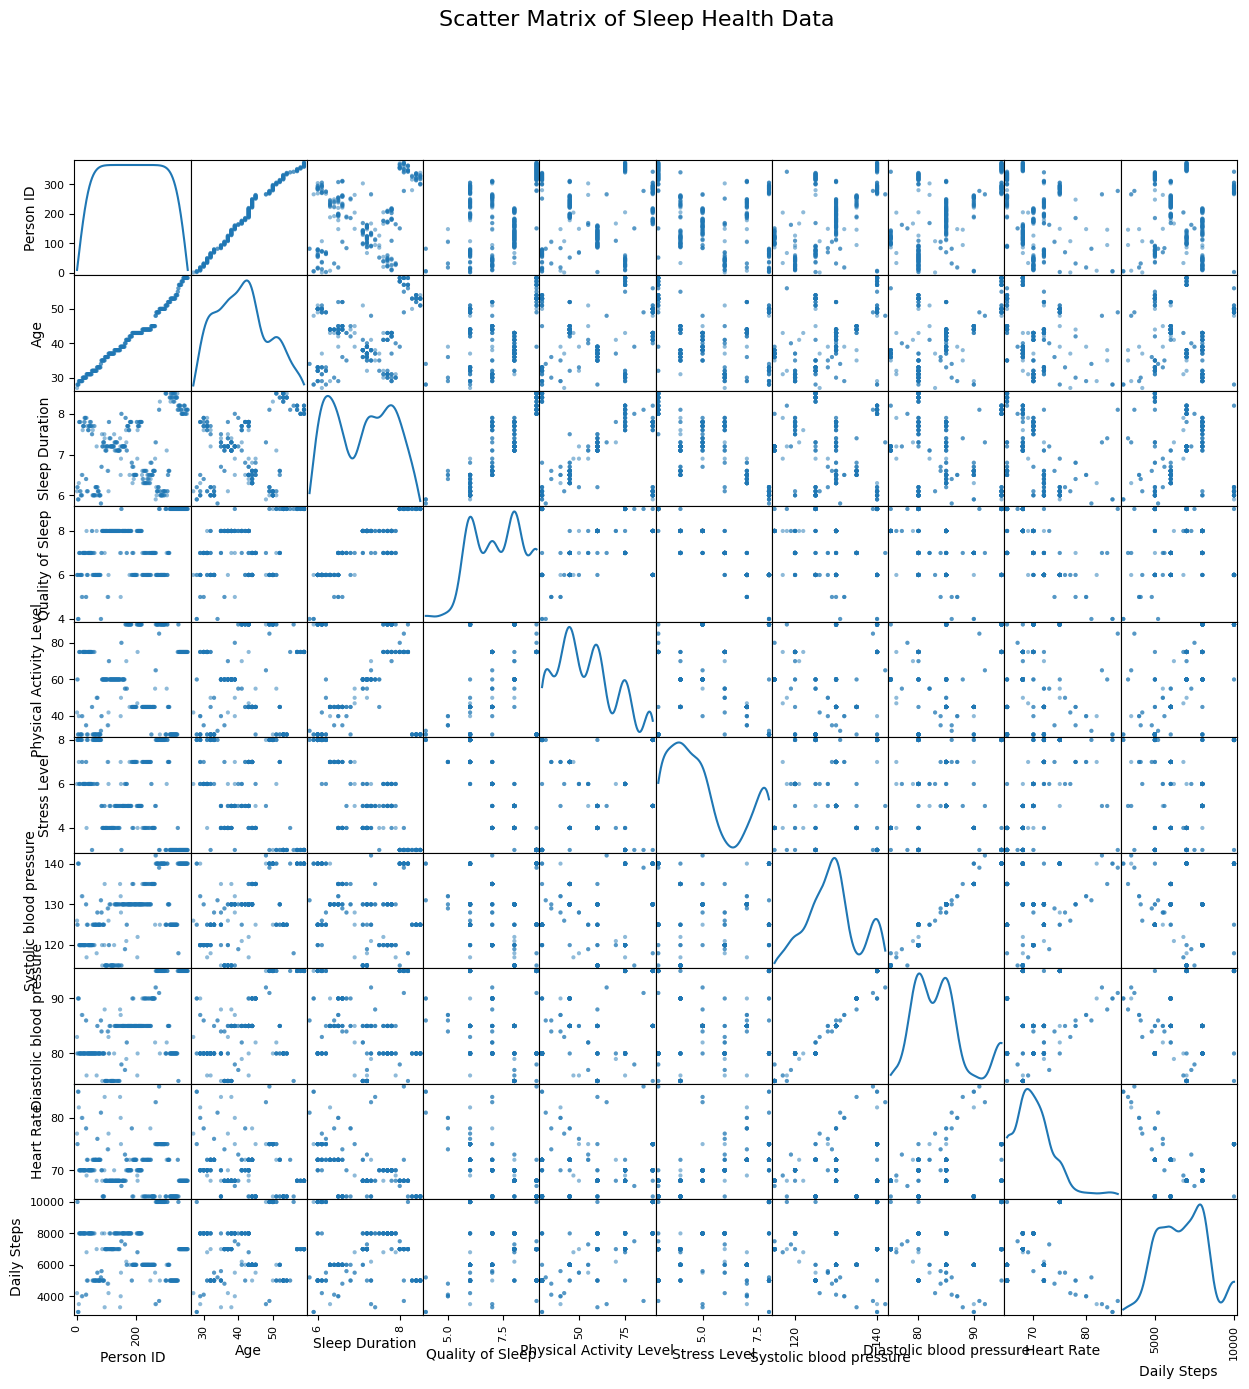

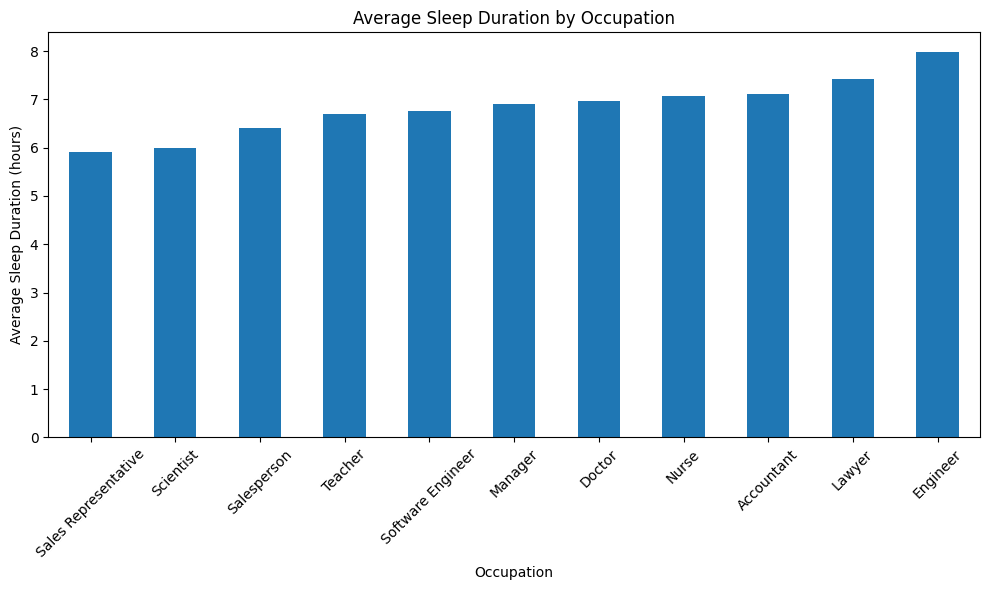

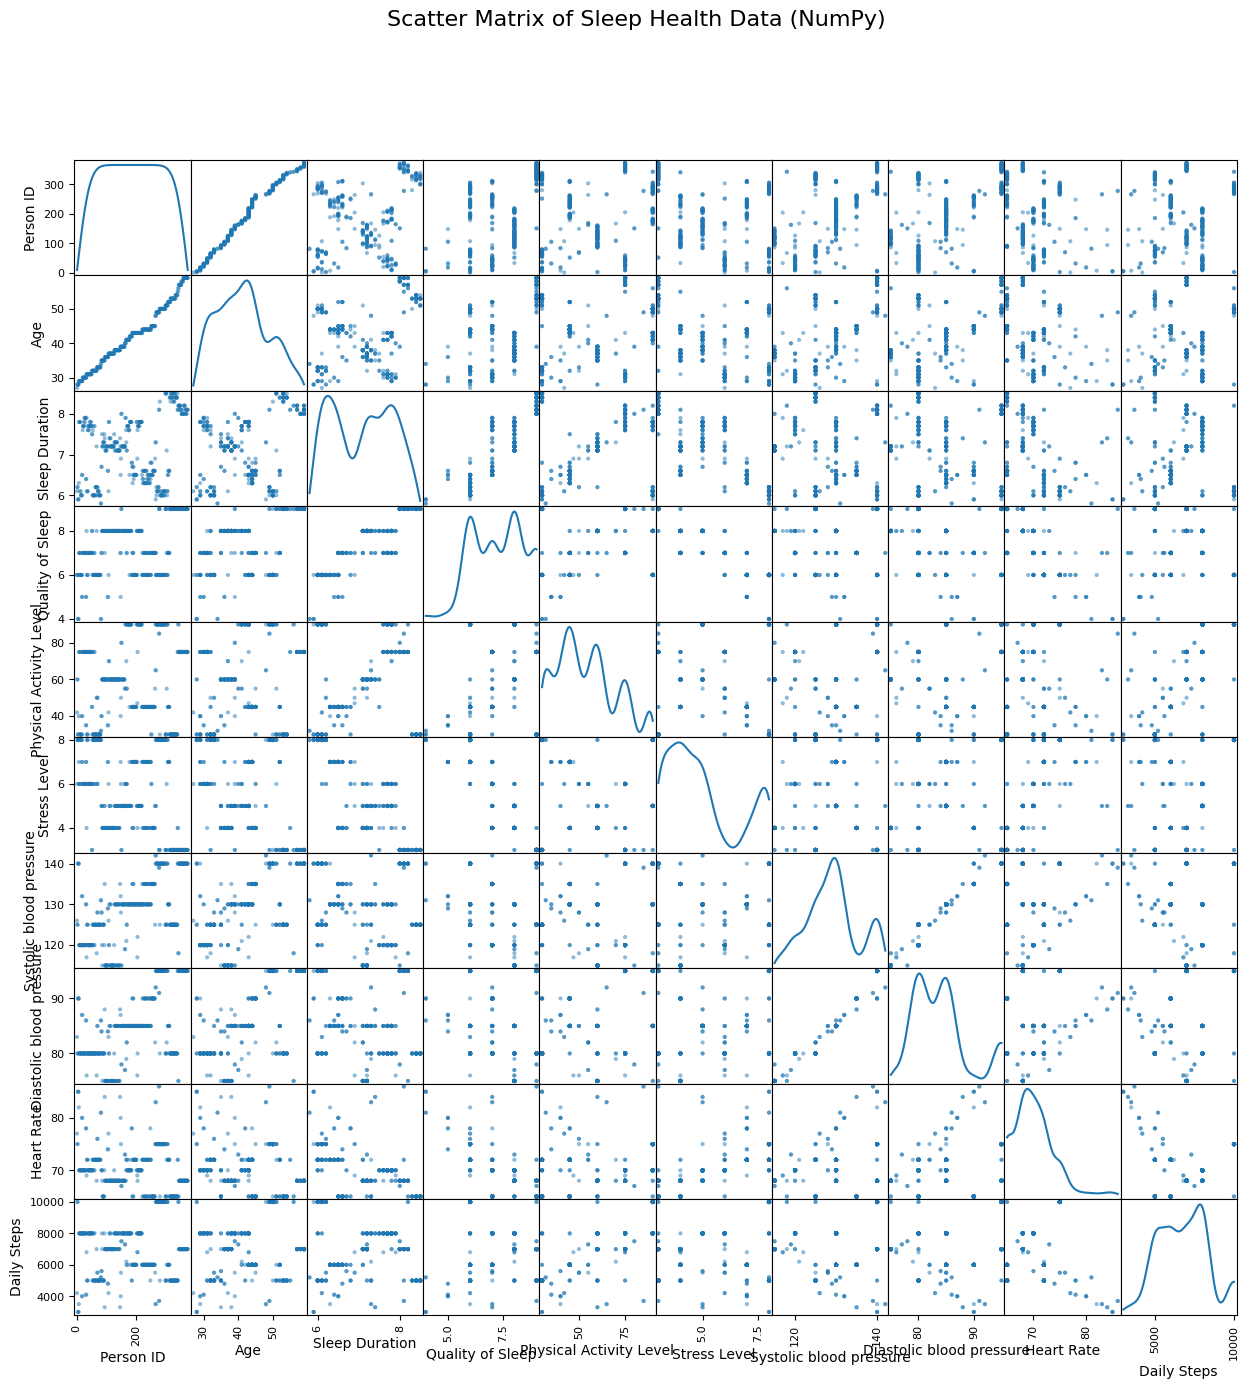

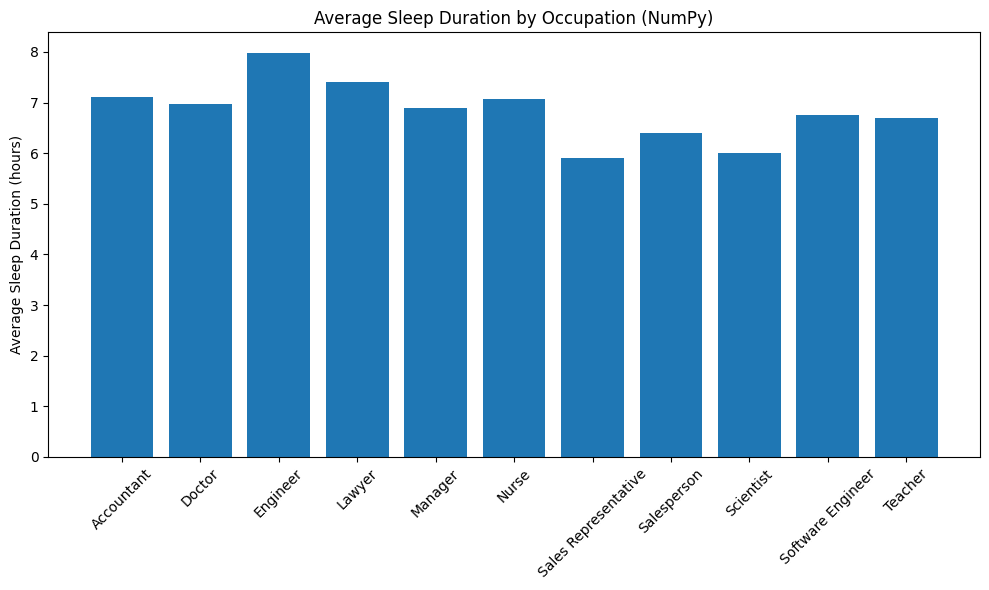

Time to use Pandas: 4.6636 seconds
Time spent using NumPy: 4.8295 seconds


In [10]:
# 记录 Pandas 绘图的时间
start_time_pandas = time.time()

# 1. 使用 Pandas 绘制散点图矩阵
pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix of Sleep Health Data', fontsize=16)
plt.show()

# 2. 使用条形图显示不同职业的平均睡眠时长
plt.figure(figsize=(10, 6))
df.groupby('Occupation')['Sleep Duration'].mean().sort_values().plot(kind='bar')
plt.title('Average Sleep Duration by Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas



# 记录 NumPy 绘图的时间
start_time_numpy = time.time()

# 1. 使用 NumPy 绘制散点图矩阵
from pandas.plotting import scatter_matrix

# 由于 NumPy 本身不支持直接绘制数据框，所以我们用 Pandas 绘制
scatter_matrix(df, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix of Sleep Health Data (NumPy)', fontsize=16)
plt.show()

# 2. 使用条形图显示不同职业的平均睡眠时长
occupations = np.unique(df['Occupation'])
avg_sleep_duration = [np.mean(df[df['Occupation'] == occupation]['Sleep Duration']) for occupation in occupations]

plt.figure(figsize=(10, 6))
plt.bar(occupations, avg_sleep_duration)
plt.title('Average Sleep Duration by Occupation (NumPy)')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy


# 输出时间差异
print(f"Time to use Pandas: {pandas_time:.4f} seconds")
print(f"Time spent using NumPy: {numpy_time:.4f} seconds")